# 지도 학습과 비지도 학습
머신러닝 알고리즘은 크게 `지도 학습(supervised learning)`과 `비지도 학습(unsupervised learning)`으로 나눌 수 있다.   
지도 학습 알고리즘은 훈련하기 위한 데이터와 정답이 필요하다.   
   
`market_problem`에서 보았던 도미와 빙어의 예를 보면, 생선의 길이와 무게를 알고리즘에 사용했다.   
이 경우 정답은 도미인지 아닌지 여부이다.   
지도 학습에서는 데이터와 정답을 `입력(input)`과 `타깃(target)`이라고 하고, 이 둘을 합쳐 `훈련 데이터(training data)`라고 부른다.   
   
그리고 앞서 입력으로 사용된 길이와 무게를 `특성(feature)`이라고 한다.   
도미와 빙어를 구분하는 데 사용한 길이와 무게가 특성인 것이다.   
   
지도 학습은 정답(타깃)이 있으니 알고리즘이 정답을 맞히는 것을 학습한다.   
예를 들어, 도미인지 빙어인지 구분하는 것이다.   
반면 비지도 학습 알고리즘은 타깃 없이 입력 데이터만 사용한다.   
이런 종류의 알고리즘은 정답을 사용하지 않으므로 무언가를 맞힐 수가 없다.   
대신 데이터를 잘 파악하거나 변형하는 데 도움을 준다.   
   
`market_problem`에서 도미와 빙어를 구분하기 위해 사용한 k-최근접 이웃 알고리즘은 입력 데이터와 타깃(정답)을 사용했으므로 당연히 지도 학습 알고리즘이다.   
이 알고리즘을 훈련하여 생선이 도미인지 아닌지를 반별하고, 이 모델이 훈련 데이터에서 도미를 100% 완벽하게 판별했다.   
모든 것이 잘 된 것 같은데 무엇이 문제일까?


# 훈련 세트와 테스트 세트
중간고사를 보기 전에 출제될 시험 문제와 정답을 미리 알려주고 시험을 본다면 어떨까?   
시험을 잘 보고 싶다면 시험 문제와 정답을 모두 외우면 된다.   
그러면 당연히 100점을 맞을 것이다.   
   
머신러닝도 이와 마찬가지이다.   
도미와 빙어의 데이터와 타깃을 주고 훈련한 다음, 같은 데이터로 테스트한다면 모두 맞히는 것이 당연하다.   
연습 문제와 시험 문제가 달라야 올바르게 학생의 능력을 평가할 수 있듯이 머신러닝 알고리즘의 성능을 제대로 평가하려면 훈련 데이터와 평가에 사용할 데이터가 각각 달라야 한다.   
   
이렇게 하는 가장 간단한 방법은 평가를 위해 또 다른 데이터를 준비하거나 이미 준비된 데이터 중에서 일부를 떼어 내어 활용하는 것이다.   
일반적으로 후자의 경우가 많다.   
평가에 사용하는 데이터를 `테스트 세트(test set)`, 훈련에 사용되는 데이터를 `훈련 세트(train set)`라고 부른다.   
   
정리하자면, `market_problem`에서 모델을 훈련하기 위한 데이터를 사용해 이 모델의 정확도를 100%라고 평가했다.   
하지만 훈련에 사용한 데이터로 모델을 평가하는 것은 적절하지 않다.   
훈련할 때 사용하지 않은 데이터로 평가해야 한다.   
이를 위해 훈련 데이터에서 일부를 떼어 내어 테스트 세트로 사용한다.

In [36]:
# 생선의 길이와 무게를 위한 리스트 준비
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

# 두 리스트를 순회하면서 각 생선의 길이와 무게를 하나의 리스트로 담은 2차원 리스트로 만들기
fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)]
fish_target = [1]*35 + [0]*14

이때, 하나의 생선 데이터를 `샘플(sample)`이라고 부른다.   
도미와 빙어는 각각 35마리, 14마리가 있으므로 전체 데이터는 49개의 샘플이 있다.   
사용하는 특성은 길이와 무게 2개이다.   
이 데이터의 처음 35개를 훈련 세트로, 나머지 14개를 테스트 세트로 사용해 본다.

In [22]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

이제 전체 데이터에서 처음 35개를 선택해야 한다.   
일반적으로 리스트처럼 배열의 요소를 선택할 때는 배열의 위치, 즉 `인덱스`를 지정해야 한다.   
예를 들어 fish_data의 다섯 번째 샘플을 출력하기 위해 다음과 같이 쓸 수 있다.

In [16]:
print(fish_data[4])

[29.0, 430.0]


파이썬 리스트는 인덱스 외에도 `슬라이싱`이라는 특별한 연산자를 제공한다.   
슬라이싱은 콜론(:)을 가운데 두고 인덱스의 범위를 지정하여 여러 개의 원소를 선택할 수 있다.   
예를 들어 첫 번째부터 다섯 번째까지의 샘플을 선택해 본다.

In [ ]:
print(fish_data[0:5])

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0]]


리스트의 리스트로 5개의 샘플이 선택되었다.   
슬라이싱을 사용할 때는 **마지막 인덱스의 원소는 포함되지 않는다**는 점을 주의해야 한다.   
예를 들어 '0:5'와 같이 지정했다면 0 ~ 4까지의 5개 원소만 선택되고 인덱스 5인 여섯 번째 원소는 선택되지 않는다.   
또 만약 '0:5'와 같이 처음부터 시작되는 슬라이싱의 경우 0을 생략하고 쓸 수 있다.

In [ ]:
print(fish_data[:5])

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0]]


이와 비슷하게 마지막 원소까지 포함할 경우 두 번째 인덱스를 생략할 수 있다.   
예를 들어 마지막에서 5개의 샘플을 출력할 때 '44:49'와 같이 쓰지 않고 '44:'만 써도 된다.

In [ ]:
print(fish_data[44:])

[[12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


이를 응용하면 생선 데이터에서 처음 35개와 나머지 14개를 선택하는 것을 간단하게 처리할 수 있다.

In [23]:
# 훈련 세트로 입력값 중 0부터 34번째 인덱스까지 사용
train_input = fish_data[:35]

# 훈련 세트로 타깃값 중 0부터 34번째 인덱스까지 사용
train_target = fish_target[:35]

# 테스트 세트로 입력값 중 35번째부터 마지막 인덱스까지 사용
test_input = fish_data[35:]

# 테스트 세트로 타깃값 중 35번째부터 마지막 인덱스까지 사용
test_target = fish_target[35:]

슬라이싱 연산으로 인덱스 0 ~ 35까지 처음 35개 샘플을 훈련 세트로 선택했고,   
인덱스 35 ~ 48까지 나머지 14개 샘플을 테스트 세트로 선택했다.   
데이터를 준비했으니 훈련 세트로 fit() 메서드를 호출해 모델을 훈련하고, 테스트 세트로 score() 메서드를 호출해 평가해 본다.

In [24]:
kn = kn.fit(train_input, train_target)
kn.score(test_input, test_target)

0.0

정확도가 0.0이다.   
`market_problem`에서 완벽했던 머신러닝 모델이 갑자기 최악의 성능을 내고 있다.   
무엇이 문제일까?

# 샘플링 편향
위의 예시에서 테스트 세트에 빙어만 들어가 있다.   
fish_data에는 처음부터 순서대로 35개의 도미와 14개의 빙어 샘플이 들어가 있다.   
따라서 마지막 14개를 테스트 세트로 만들면 빙어 데이터만 들어간다.   
   
상식적으로 훈련하는 데이터와 테스트하는 데이터에는 도미와 빙어가 골고루 섞여 있어야 한다.   
일반적으로 훈련 세트와 테스트 세트에 샘플이 골고루 섞여 있지 않으면 샘플링이 한쪽으로 치우쳤다는 의미로 **샘플링 편향(sampling bias)**이라고 부른다.   
   
위의 예에서는 훈련 세트에 도미만 있기 때문에 테스트 세트가 무엇이든 무조건 도미라고 분류한다.   
그런데 테스트 세트는 빙어만 있기 때문에 정답을 하나도 맞히지 못한다.   
   
훈련 세트와 테스트 세트를 나누기 전에 데이터를 섞든지 아니면 골고루 샘플을 뽑아서 훈련 세트와 테스트 세트를 만들어야 한다.   
이런 작업을 간편하게 처리할 수 있도록 파이썬 라이브러리인 넘파이를 이용한다.

# 넘파이
넘파이는 파이썬의 대표적인 배열(array) 라이브러리이다.   
앞서 파이썬의 리스트로 2차원 리스트를 표현할 수 있지만, 고차원 리스트를 표현하려면 매우 번거롭다.   
넘파이는 고차원의 배열을 손쉽게 만들고 조작할 수 있는 간편한 도구를 많이 제공한다.

In [39]:
import numpy as np

파이썬 리스트를 넘파이 배열로 바꾸기는 정말 쉽다.   
넘파이 array() 함수에 파이썬 리스트를 전달하면 끝이다.

In [40]:
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

print(input_arr)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


위의 출력 결과에서 확인할 수 있듯이, 넘파이는 친절하게 배열의 차원을 구분하기 쉽도록 행과 열을 가지런히 출력한다.   
눈으로 확인하는 것 외에도 넘파이 배열 객체는 배열의 크기를 알려주는 shape 속성을 제공한다.   
이미 우리는 49개의 샘플과 2개의 특성이 있는 것을 안다.

In [26]:
print(input_arr.shape)

(49, 2)


이제 생선 데이터를 넘파이 배열로 준비했으므로 이 배열에서 랜덤하게 샘플을 선택해 훈련 세트와 테스트 세트로 만들 차례이다.   
여기에서는 배열을 섞은 후에 나누는 방식 대신에 무작위로 샘플을 고르는 방법을 사용한다.   
   
한 가지 주의할 점은 input_arr와 target_arr에서 같은 위치는 함께 선택되어야 한다는 점이다.   
예를 들어, input_arr의 두 번째 값은 훈련 세트로 가고, target_arr의 두 번째 값은 테스트 세트로 가면 안 된다.   
타깃이 샘플과 함께 이동하지 않으면 올바르게 훈련될 수 없다.   
   
이렇게 하려면 훈련 세트와 테스트 세트로 나눌 인덱스값을 잘 기억해야 한다.   
항상 인덱스값을 기억할 수는 없으니 다른 방법이 필요하다.   
아예 인덱스를 섞은 다음 input_arr와 target_arr에서 샘플을 선택하면 무작위로 훈련 세트를 나누는 셈이 된다.   
   
넘파이 arange() 함수를 사용하면 0에서부터 48까지 1씩 증가하는 인덱스를 간단히 만들 수 있다.

In [41]:
np.random.seed(42)
index = np.arange(49)
np.random.shuffle(index)

print(index)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


넘파이 arange() 함수에 정수 N을 전달하면 0에서부터 N-1까지 1씩 증가하는 배열을 만든다.   
넘파이 random 패키지 아래에 있는 shuffle() 함수는 주어진 배열을 무작위로 섞는다.   
   
0부터 48까지 정수가 잘 섞였다.   
랜덤하게 섞인 인덱스를 사용해 전테 데이터를 훈련 세트와 테스트 세트로 나누어 본다.   
   
넘파이는 슬라이싱 외에 **배열 인덱싱**이란 기능을 제공한다.   
배열 인덱싱은 1개의 인덱스가 아닌 여러 개의 인덱스로 한 번에 여러 개의 원소를 선택할 수 있다.   
예를 들어 다음처럼 input_arr에서 두 번째와 네 번째 샘플을 선택하여 출력할 수 있다.

In [28]:
print(input_arr[[1, 3]])

[[ 26.3 290. ]
 [ 29.  363. ]]


비슷한 방식으로 리스트 대신 넘파이 배열을 인덱스로 전달할 수도 있다.   
앞서 만든 index 배열의 처음 35개를 input_arr와 target_arr에 전달하여 랜덤하게 35개의 샘플을 훈련 세트로 만든다.

In [42]:
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

# 만들어진 index의 첫 번째 값은 13이다.
# 따라서 train_input의 첫 번째 원소는 input_arr의 14번째 원소가 들어 있을 것이다.
print(input_arr[13], train_input[0])

[ 32. 340.] [ 32. 340.]


나머지 14개를 테스트 세트로 만든다.

In [45]:
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

모든 데이터가 준비되었다.   
훈련 세트와 테스트 세트에 도미와 빙어가 잘 섞여 있는지 산점도로 그려 본다.

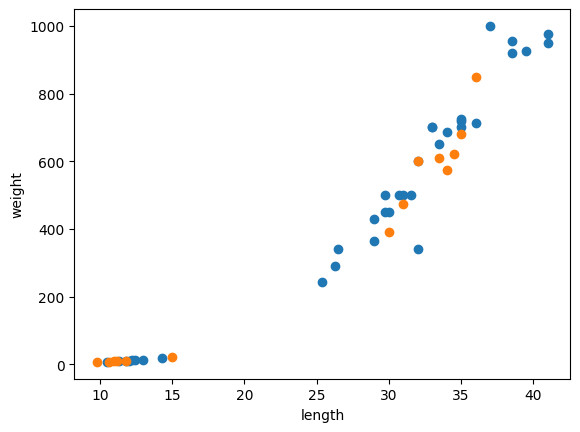

In [46]:
import matplotlib.pyplot as plt

# 2차원 배열은 행과 열 인덱스를 콤마(,)로 나누어 지정한다.
# 따라서 모든 행의 첫 번째 열이 x, 모든 행의 두 번째 열이 y로 들어간다.
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(test_input[:,0], test_input[:,1])

plt.xlabel('length')
plt.ylabel('weight')

plt.show()

파란색이 훈련 세트이고 주황색이 테스트 세트이다.   
양쪽에 도미와 빙어가 모두 섞여 있다.   
의도한 대로 만들어진 것 같다.   
이제 모델을 다시 훈련시켜 본다.

# 머신러닝 프로그램
앞서 만든 훈련 세트와 테스트 세트로 k-최근접 이웃 모델을 훈련시켜 본다.   
fit() 메서드를 실행할 때마다 KNeighborsClassifier 클래스의 객체는 이전에 학습한 모든 것을 잃어버린다.   
이전 모델을 그대로 두고 싶다면 KNeighborsClassifier 클래스 객체를 새로 만들어야 한다.   
여기에서는 단순하게 이전에 만든 kn 객체를 그대로 사용한다.

In [47]:
kn = kn.fit(train_input, train_target)

인덱스를 섞어 만든 train_input과 train_target으로 모델을 훈련시켰다.   
다음은 test_input과 test_target으로 이 모델을 테스트할 차례이다.

In [48]:
kn.score(test_input, test_target)

1.0

predict() 메서드로 테스트 세트의 예측 결과와 실제 타깃을 확인해 본다.

In [49]:
kn.predict(test_input)

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [50]:
test_target

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

# 훈련 모델 평가
모델을 훈련할 때 사용한 데이터로 모델의 성능을 평가하는 것은 정답을 미리 알려주고 시험을 보는 것과 같다.   
공정하게 점수를 매기기 위해서는 훈련에 참여하지 않은 샘플을 사용해야 한다.   
   
이 때문에 훈련 데이터를 훈련 세트와 테스트 세트로 나누었다.   
훈련 세트로는 모델을 **훈련**하고 테스트 세트로 모델을 **평가**했다.   
하지만 테스트 세트를 그냥 무작정 나누어서는 안 된다.   
도미와 빙어를 분류하는 것이 목적이기 때문에 훈련 세트나 테스트 세트에 어느 한 생선만 들어가 있다면 올바른 학십이 이루어지지 않을 것이다.   
   
도미와 빙어를 골고루 섞어 나누기 위해 파이썬의 다차원 배열 라이브러리인 넘파이를 사용해 보았다.   
넘파이는 파이썬의 리스트와 비슷하지만 고차원의 큰 배열을 효과적으로 다룰 수 있고, 다양한 도구를 많이 제공한다.   
이 예제에서는 넘파이의 shuffle() 함수를 사용해 배열의 인덱스를 섞었다.